## 词向量训练

In [1]:
import gensim
from gensim.corpora import WikiCorpus
import jieba
from langconv import *
import re

D:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [22]:
def wiki_process():
    space = ' '
    i = 0
    l = []
    #zhwiki_name = 'D:\python\datasource\wiki_data\zhwiki-pages-articles-multistream.xml.bz2'
    zhwiki_name = 'D:\python\datasource\wiki_data\process\AA\wiki_00'
#     zhwiki_name = r'D:\python\datasource\xiaoshuo\大周皇族.txt'
    f = open('D:\python\datasource\wiki_data/reduce_zhiwiki.txt','w',encoding = 'utf-8')
    wikiFile = open(zhwiki_name,'r',encoding='utf-8')
    for text in wikiFile:
        text = text.strip()
        if not text: continue
        if re.match(r'<.*>',text): continue
        temp_sentence = Converter('zh-hans').convert(text)
        print(temp_sentence)
        temp_sentence = "".join(re.findall(r'\w+',temp_sentence)        )
        seg_list = list(jieba.cut(temp_sentence))
        for temp_term in seg_list:
            l.append(temp_term)
        #print(l)
        f.write(space.join(l) + '\n')
        l = []
        i = i + 1
        if (i%2000 == 0):#设置读取文章数量
            print('Saved ' + str(i) + 'articles')            
    f.close()

In [20]:
wiki_process()

OSError: [Errno 22] Invalid argument: 'D:\\python\\datasource\\wiki_data\reduce_zhiwiki.txt'

In [2]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
import logging

In [36]:
def train():
    wiki_news = open('D:\python\datasource\wiki_data/reduce_zhiwiki.txt', 'r',encoding='utf-8')
    model = Word2Vec(LineSentence(wiki_news),sg=0, size=192, window=5,min_count=5, workers=5)
    model.save('D:\python\datasource\wiki_data\zhiwiki_news.word2vec')

In [37]:
train()

D:\ProgramData\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [5]:
model = Word2Vec.load('D:\python\datasource\wiki_data\zhiwiki_news.word2vec')

D:\ProgramData\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [7]:
vocab = model.wv.vocab

In [8]:
type(vocab)

dict

Object `vocab.Vocab` not found.


In [15]:
for i,v in enumerate(vocab):
    print(v," : ",vocab[v])
    print(type(model[v]))
    if i > 2: break

数学  :  Vocab(count:946, index:402, sample_int:4294967296)
<class 'numpy.ndarray'>
是  :  Vocab(count:37044, index:3, sample_int:1609636076)
<class 'numpy.ndarray'>
利用  :  Vocab(count:927, index:414, sample_int:4294967296)
<class 'numpy.ndarray'>
研究  :  Vocab(count:3529, index:66, sample_int:4294967296)
<class 'numpy.ndarray'>


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
import random

In [10]:
random.choice(vocab)

KeyError: 39391

In [6]:
len(model.wv.vocab)

45572

In [39]:
print(model.wv.similarity('天气','预报'))

KeyError: "word '预报' not in vocabulary"

In [65]:
print(model.wv.similarity('优秀','好看'))

0.5362319468479373


In [62]:
print(model.wv.similarity('强大','优秀'))

0.4093865636525054


In [50]:
print(model)

Word2Vec(vocab=20687, size=192, alpha=0.025)


In [49]:
print(model.wv)

In [3]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [4]:
plt.rcParams['font.sans-serif'] = ['SimHei']

In [28]:
def tsne_plot(model):
    labels = []
    tokens = []
    i = 0
    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
        i += 1
        if i > 100: break
#     print(len(labels),len(tokens))
#     print(labels,len(tokens[2]))
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)
#     print(new_values)
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    plt.figure(figsize = (16,16))
#     print(len(x))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],xy=(x[i],y[i]), xytext=(5,2), 
                     textcoords='offset points', ha='right', va='bottom')
    plt.show()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


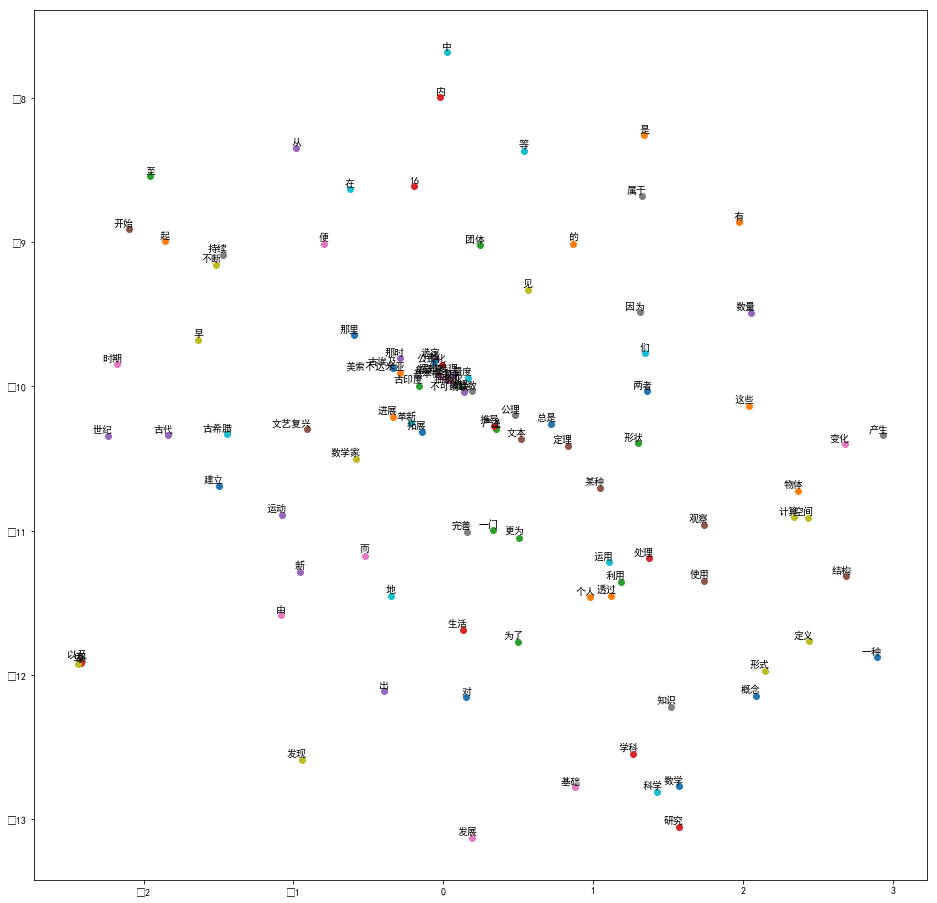

In [29]:
tsne_plot(model)

In [18]:
model?